In [1]:
from patchedimage import PatchedImage
from utilities import *

In [2]:
imgp = PatchedImage("images/lena.tif",4)
#imgp.set_masque(masque_circulaire((50,50),15,imgp.img.shape))
imgp.set_masque(masque_carre((40,40),(200,200),imgp.img.shape),leaf_size=128)#+masque_circulaire((20,50),15,imgp.img.shape))
imgp.set_priorities()
imgp.show_img()
plt.show()

plt.imshow(imgp.priority)
plt.show()

ValueError: Input contains NaN.

In [3]:
for j in range(40,45):   
    for i in range(40,45):
        imgp.reconstruction((j,i))

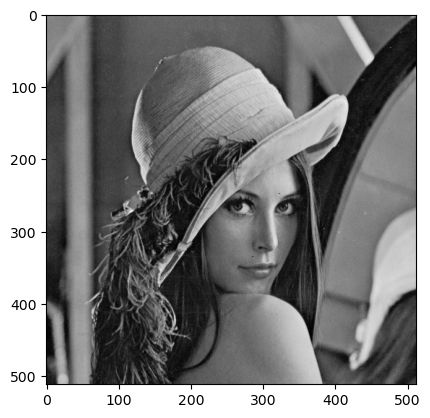

In [4]:
imgp.show_img()